### Factor Analysis
This notebook illustrates how to use sklearn.FactorAnalysis method to conduct factor analysis on a sample data set.

In [2]:
import numpy as np
import csv
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import scipy.stats.mstats as ms
import mpld3
%matplotlib inline

In [3]:
# Load data
X = np.zeros((387,11))
names = []
with open('../data/04cars.dat','r') as f:
    reader = csv.reader(f)
    lind = 0
    for row in reader:
        names.append(row[0])
        X[lind,:] = row[8:]
        lind = lind + 1
# variable names
l = ['Retail Price','Dealer Price','Engine Size','Cylinders','Horsepower','City MPG','Highway MPG','Weight','Wheel Base','Length','Width']


In [4]:
# Setup the factor analysis model
fa = FactorAnalysis(n_components=2)
# fit the data
zX = ms.zscore(X)
f = fa.fit(zX)
W = ms.zscore(np.transpose(f.components_))
Psi = f.noise_variance_

In [5]:
print names

['Chevrolet Aveo 4dr', 'Chevrolet Aveo LS 4dr hatch', 'Chevrolet Cavalier 2dr', 'Chevrolet Cavalier 4dr', 'Chevrolet Cavalier LS 2dr', 'Dodge Neon SE 4dr', 'Dodge Neon SXT 4dr', 'Ford Focus ZX3 2dr hatch', 'Ford Focus LX 4dr', 'Ford Focus SE 4dr', 'Ford Focus ZX5 5dr', 'Honda Civic DX 2dr', 'Honda Civic HX 2dr', 'Honda Civic LX 4dr', 'Hyundai Accent 2dr hatch', 'Hyundai Accent GL 4dr', 'Hyundai Accent GT 2dr hatch', 'Hyundai Elantra GLS 4dr', 'Hyundai Elantra GT 4dr', 'Hyundai Elantra GT 4dr hatch', 'Kia Optima LX 4dr', 'Kia Rio 4dr manual', 'Kia Rio 4dr auto', 'Kia Spectra 4dr', 'Kia Spectra GS 4dr hatch', 'Kia Spectra GSX 4dr hatch', 'Mini Cooper', 'Nissan Sentra 1.8 4dr', 'Nissan Sentra 1.8 S 4dr', 'Pontiac Sunfire 1SA 2dr', 'Saturn Ion1 4dr', 'Saturn lon2 4dr', 'Saturn lon3 4dr', 'Saturn lon2 quad coupe 2dr', 'Saturn lon3 quad coupe 2dr', 'Scion xA 4dr hatch', 'Suzuki Aeno S 4dr', 'Suzuki Aerio LX 4dr', 'Suzuki Forenza S 4dr', 'Suzuki Forenza EX 4dr', 'Toyota Corolla CE 4dr', 'Toyo

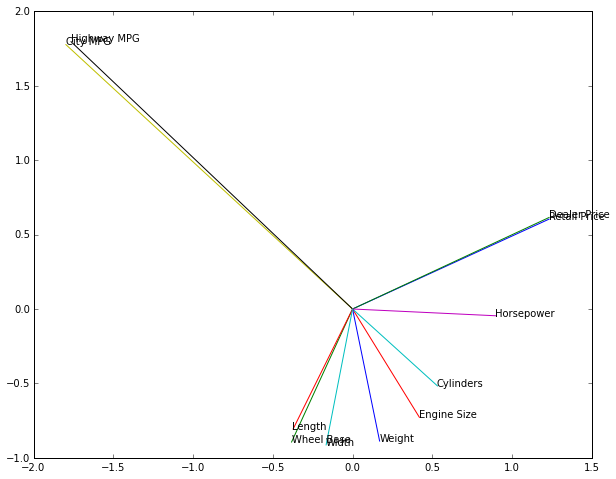

In [7]:
# We first visualize and interpret the W matrix
fig = plt.figure(figsize=[10,8])
for i in range(W.shape[0]):
    plt.plot([0,W[i,0]],[0,W[i,1]])
    plt.text(W[i,0],W[i,1],l[i])

In [9]:
# Find latent scores for each data point using the latent factors
Z = f.fit_transform(zX)
fig = plt.figure(figsize=[12,10])
#for i in range(W.shape[0]):
#    plt.plot([0,W[i,0]],[0,W[i,1]])

scatter = plt.scatter(Z[:,0],Z[:,1])
#for i in range(Z.shape[0]):
    #if abs(Z[i,0]) > 1.5 or abs(Z[i,1]) > 1.5:
#    plt.text(Z[i,0],Z[i,1],names[i],fontsize=8)
    
labels1 = ['%s'%(names[i]) for i in range(Z.shape[0])]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels1)
mpld3.plugins.connect(fig, tooltip)
mpld3.display(fig)

